In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import plotly.express as px


In [11]:
sia = SentimentIntensityAnalyzer()

In [2]:
# read in data 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
# create conditions to seperate them into buckets 
conditions = [
    (twitter_archive ['rating_numerator'] <= 4),
    (twitter_archive ['rating_numerator'] > 4) & (twitter_archive ['rating_numerator'] <= 6 ),
    (twitter_archive ['rating_numerator'] > 6) & (twitter_archive ['rating_numerator'] <= 10),
    (twitter_archive ['rating_numerator'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = ['not_so_cute', 'okay', 'cute', 'cuteness_overflow']


In [9]:
# create a new column with the condition 
twitter_archive['rating_bucket'] = np.select(conditions, values)
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_bucket
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,cuteness_overflow
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,cuteness_overflow
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,cuteness_overflow
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,cuteness_overflow
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,cuteness_overflow


In [30]:
# check the bucket sizes
twitter_archive.rating_bucket.value_counts()

cuteness_overflow    1455
cute                  776
okay                   69
not_so_cute            56
Name: rating_bucket, dtype: int64

In [54]:
# twitter_archive.loc[twitter_archive['rating_bucket'] =='cutene', 'text']
bucket_data = dict.fromkeys(['not_so_cute', 'okay', 'cute', 'cuteness_overflow'], list())
bucket_data

{'not_so_cute': [], 'okay': [], 'cute': [], 'cuteness_overflow': []}

In [55]:
### adding corresponding polarity score 
for i in range(twitter_archive.shape[0]):
    if twitter_archive['rating_bucket'][i] == 'not_so_cute':
        bucket_data['not_so_cute'] = bucket_data['not_so_cute']+[sia.polarity_scores(twitter_archive['text'][i])]
    elif twitter_archive['rating_bucket'][i] == 'okay':
        bucket_data['okay']= bucket_data['okay']+[sia.polarity_scores(twitter_archive['text'][i])]
    elif twitter_archive['rating_bucket'][i] == 'cute':
        bucket_data['cute']=bucket_data['cute']+[sia.polarity_scores(twitter_archive['text'][i])]
    else:
        bucket_data['cuteness_overflow']=bucket_data['cuteness_overflow']+[sia.polarity_scores(twitter_archive['text'][i])]
    

In [65]:
# putting them into dataframe
df1 = pd.DataFrame(bucket_data['not_so_cute'])
df1['rating_bucket'] = 'not_so_cute'
df2 = pd.DataFrame(bucket_data['okay'])
df3 = pd.DataFrame(bucket_data['cute'])
df4 = pd.DataFrame(bucket_data['cuteness_overflow'])
df2['rating_bucket'] = 'okay'
df3['rating_bucket'] = 'cute'
df4['rating_bucket'] = 'cuteness_overflow'
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)

In [85]:
bucket_data_copy = bucket_data

In [99]:
bucket_data_copy['cute']

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209},
 {'neg': 0.179, 'neu': 0.821, 'pos': 0.0},
 {'neg': 0.157, 'neu': 0.843, 'pos': 0.0},
 {'neg': 0.153, 'neu': 0.847, 'pos': 0.0},
 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195},
 {'neg': 0.403, 'neu': 0.597, 'pos': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'neg': 0.091, 'neu': 0.909, 'pos': 0.0},
 {'neg': 0.0, 'neu': 0.697, 'pos': 0.303},
 {'neg': 0.127, 'neu': 0.696, 'pos': 0.177},
 {'neg': 0.0, 'neu': 0.604, 'pos': 0.396},
 {'neg': 0.111, 'neu': 0.889, 'pos': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'neg': 0.0, 'neu': 0.817, 'pos': 0.183},
 {'neg': 0.0, 'neu': 0.926, 'pos': 0.074},
 {'neg': 0.142, 'neu': 0.758, 'pos': 0.1},
 {'neg': 0.0, 'neu': 0.673, 'pos': 0.327},
 {'neg': 0.093, 'neu': 0.61, 'pos': 0.297},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'neg': 0.0, 'neu': 0.905, 'pos': 0.095},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'neg': 0.0, 'neu': 0.905, 'pos

In [86]:
for key, item in bucket_data_copy.items():
    bucket_data_copy[key] = [{k: v for k, v in d.items() if k != 'compound'} for d in bucket_data_copy[key]]
    test_data[key] = test_data[key] + max(bucket_data_copy['not_so_cute'][0], key=bucket_data_copy['not_so_cute'][0].get)


In [98]:
[max(bucket_data_copy['cute'][i], key=bucket_data_copy['cute'][i].get)
     for i in range(len(bucket_data_copy['cute']))]


['neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',


In [92]:
df['test'] = argmax(df[''])

,neg,neu,pos,compound,rating_bucket
0,0.106,0.894,0.000,-0.2263,not_so_cute
1,0.297,0.703,0.000,-0.7342,not_so_cute
2,0.173,0.708,0.119,-0.2960,not_so_cute
3,0.099,0.901,0.000,-0.3412,not_so_cute
4,0.060,0.812,0.128,0.3818,not_so_cute


In [90]:
bucket_data_copy['not_so_cute']

[{'neg': 0.106, 'neu': 0.894, 'pos': 0.0},
 {'neg': 0.297, 'neu': 0.703, 'pos': 0.0},
 {'neg': 0.173, 'neu': 0.708, 'pos': 0.119},
 {'neg': 0.099, 'neu': 0.901, 'pos': 0.0},
 {'neg': 0.06, 'neu': 0.812, 'pos': 0.128},
 {'neg': 0.34, 'neu': 0.561, 'pos': 0.098},
 {'neg': 0.238, 'neu': 0.762, 'pos': 0.0},
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333},
 {'neg': 0.442, 'neu': 0.558, 'pos': 0.0},
 {'neg': 0.166, 'neu': 0.834, 'pos': 0.0},
 {'neg': 0.102, 'neu': 0.776, 'pos': 0.122},
 {'neg': 0.202, 'neu': 0.588, 'pos': 0.21},
 {'neg': 0.461, 'neu': 0.539, 'pos': 0.0},
 {'neg': 0.222, 'neu': 0.667, 'pos': 0.111},
 {'neg': 0.0, 'neu': 0.747, 'pos': 0.253},
 {'neg': 0.0, 'neu': 0.826, 'pos': 0.174},
 {'neg': 0.238, 'neu': 0.634, 'pos': 0.129},
 {'neg': 0.192, 'neu': 0.712, 'pos': 0.096},
 {'neg': 0.0, 'neu': 0.773, 'pos': 0.227},
 {'neg': 0.128, 'neu': 0.684, 'pos': 0.188},
 {'neg': 0.269, 'neu': 0.533, 'pos': 0.198},
 {'neg': 0.32, 'neu': 0.68, 'pos': 0.0},
 {'neg': 0.118, 'neu': 0.882, 'pos': 0.

In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [100]:
fig = px.histogram(df1, x=['neu','pos','neg'],title="Sentiment Analysis Distribution for Low Rating Dogs")
fig.show()

In [111]:
def word_processing(tag) : 
    b = twitter_archive.loc[twitter_archive['rating_bucket'] ==tag, 'text'].tolist()
    b1 = ' '.join(b)
    b1 = re.sub(r"https://\S+","",b1)
    b1 = re.sub(r"\d+/\d+","",b1)
    b1 = re.sub(r"RT",'',b1)
    b1 = re.sub(r"^[@#]\S+",'', b1) # removing hashtag and at 
    wordcloud2 = WordCloud().generate(b1)
    return wordcloud2 


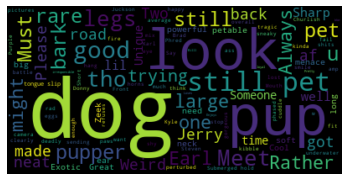

In [112]:
plt.imshow(word_processing('okay'), interpolation='bilinear')
plt.axis("off")
plt.show()

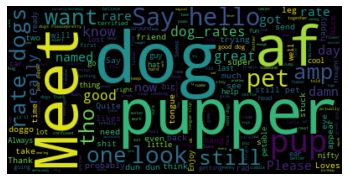

In [113]:
plt.imshow(word_processing('cute'), interpolation='bilinear')
plt.axis("off")
plt.show()

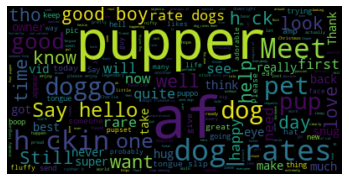

In [114]:
plt.imshow(word_processing('cuteness_overflow'), interpolation='bilinear')
plt.axis("off")
plt.show()